# About Project
**Group No: 6**

**Group Members: Rahul Hipparkar, Lily Holmes, Andrea Caceres, Isra Marcu**

**Project Name: Campus Event Scheduling System**

**Github Repo link**:  https://github.com/RahulHipparkar/DSA-GP1---Campus-Event-Scheduling-System

**Objective**: We’ve been hired to design a lightweight scheduling system for managing campus events (talks, hackathons, concerts, exams, etc.). The system must allow adding, searching, sorting, and conflict-checking events efficiently as the event list grows from a handful to thousands.

Our group will design and implement custom data structures and algorithms to power the system, compare their performance, and present results.




# Importing files as modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from src.models.event import Event
from src.models.ArrayList import DynamicArray
from src.models.LinkedList import LinkedList
from src.searching.Linear_Search import linear_search
from src.searching.Binary_Search import binary_search,sort
from src.sorting.Get_Key import key
from src.sorting.Insertion_Sort import insertion_sort
from src.sorting.Slicing import slice_array
from src.sorting.Merge_Sort import merge_sort
from src.sorting.Quick_Sort import quick_sort
from src.sorting.Insertion_Sort_Linked_List import insertion_sort_linked_list
from src.sorting.Merge_Sort_Linked_List import merge_sort_list
from src.sorting.Quick_Sort_Linked_List import quickSort
from src.searching.Conflict_Detection import find_conflicts,display_conflicts

# Random generator for dynamic array

In [8]:
import datetime
import random
import time
def random_time():
    hour = random.randint(0, 23)
    minute = random.randint(0, 59)
    return f"{hour:02d}:{minute:02d}"
def random_date():
# initialize start and end dates
  start_date = datetime.date(2025, 8, 22)
  end_date   = datetime.date(2026, 5, 15)

  # create a single random day
  num_days = (end_date - start_date).days
  rand_days = random.randint(1, num_days)
  random_date = start_date + datetime.timedelta(days = rand_days)

  return random_date.strftime("%Y-%m-%d")

def create_random_DynamicArray(n):
  titles = ["talk", "hackathon", "concert", "exam", "orientation"]
  locations = ["Baca", "Folsom", "Norlin Room A", "Norlin Room B"]

  event_schedule = DynamicArray() # dynamic array instance

  for i in range(n):
    id = random.randint(1,10000)
    title = random.choice(titles)
    date = random_date()
    time = random_time() # 24 hour time, 8am to 8pm
    location = random.choice(locations)

    e = Event(id, title, date, time, location)
    event_schedule.append(e)

  return event_schedule

In [9]:
arr = create_random_DynamicArray(50)
arr.list_all()

[{'Id': 8749, 'Title': 'talk', 'Date': '2026-05-08', 'Time': '11:45', 'Location': 'Norlin Room B'},
 {'Id': 3061, 'Title': 'concert', 'Date': '2026-02-26', 'Time': '07:04', 'Location': 'Norlin Room B'},
 {'Id': 8113, 'Title': 'concert', 'Date': '2026-03-14', 'Time': '13:45', 'Location': 'Baca'},
 {'Id': 5362, 'Title': 'talk', 'Date': '2025-08-30', 'Time': '19:22', 'Location': 'Norlin Room B'},
 {'Id': 5724, 'Title': 'orientation', 'Date': '2026-01-11', 'Time': '01:03', 'Location': 'Norlin Room B'},
 {'Id': 3201, 'Title': 'concert', 'Date': '2026-02-15', 'Time': '09:21', 'Location': 'Baca'},
 {'Id': 7144, 'Title': 'concert', 'Date': '2026-01-02', 'Time': '04:02', 'Location': 'Norlin Room B'},
 {'Id': 7682, 'Title': 'hackathon', 'Date': '2026-03-01', 'Time': '06:06', 'Location': 'Folsom'},
 {'Id': 1077, 'Title': 'exam', 'Date': '2026-04-09', 'Time': '15:42', 'Location': 'Norlin Room A'},
 {'Id': 4003, 'Title': 'exam', 'Date': '2026-03-19', 'Time': '11:11', 'Location': 'Norlin Room B'},
 

# Random Generator for Linked List

In [10]:
def create_random_LinkedList(n):
  titles = ["talk", "hackathon", "concert", "exam", "orientation"]
  locations = ["Baca", "Folsom", "Norlin Room A", "Norlin Room B"]

  event_schedule = LinkedList() # dynamic array instance

  for i in range(n):
    id = random.randint(1,10000)
    title = random.choice(titles)
    date = random_date()
    time = random_time() # 24 hour time, 8am to 8pm
    location = random.choice(locations)

    e = Event(id, title, date, time, location)
    event_schedule.append(e)

  return event_schedule

# Experimentation

## Comparing runtime of sorting algorithms for dynamic arrays

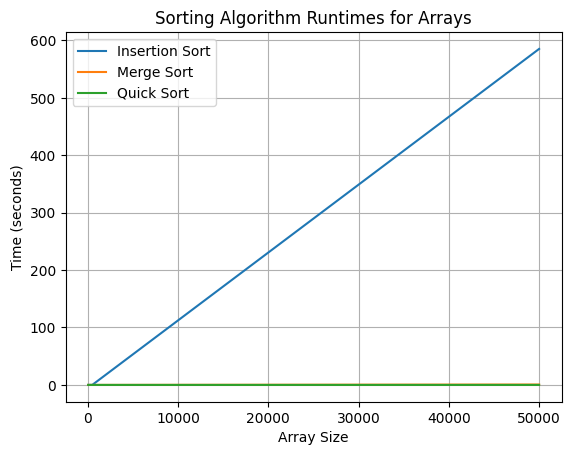

In [11]:
def measure_time(function):
  start = time.time()
  function()
  end= time.time()
  return round(end - start, 5)

merge_sort_runtime = []
insertion_sort_runtime = []
quick_sort_runtime = []

size = [50,500,50000]
for i in size:
    arr = create_random_DynamicArray(i)
    merge_sort_runtime.append(measure_time(lambda: merge_sort(arr)))
    insertion_sort_runtime.append(measure_time(lambda: insertion_sort(arr)))
    quick_sort_runtime.append(measure_time(lambda: quick_sort(arr,0,len(arr)-1)))

plt.plot(size, insertion_sort_runtime, label='Insertion Sort')
plt.plot(size, merge_sort_runtime,label='Merge Sort')
plt.plot(size, quick_sort_runtime, label='Quick Sort')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Runtimes for Arrays')
plt.legend()
plt.grid(True)

**Inference**:

- Here we can see, insertion sort on  dynamic array gives a time complexity of O(N^2). For smaller input sizes , it performs comparably to merge sort and quick sort showing negligible runtime differences.
- Quick sort and Merge sort gives same performance with O(NlogN) time complexity as we see an overlap in runtime.

## Comparing runtime of sorting alogrithm for Linked List

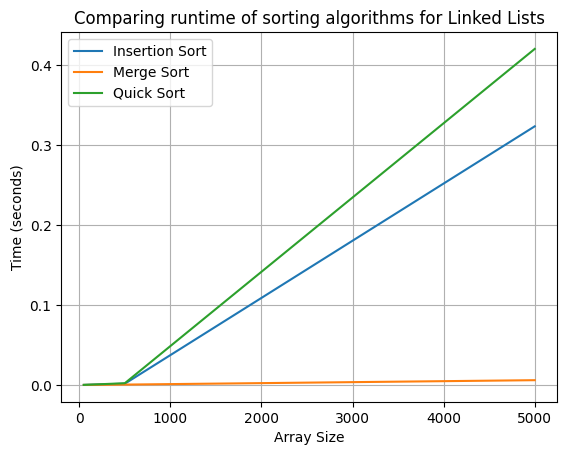

In [12]:
import sys
sys.setrecursionlimit(100000)
merge_sort_ll_runtime = []
insertion_sort_ll_runtime = []
quick_sort_ll_runtime = []

size = [50,500,5000]
for i in size:
    List = create_random_LinkedList(i)
    merge_sort_ll_runtime.append(measure_time(lambda: merge_sort_list(List.head)))
    insertion_sort_ll_runtime.append(measure_time(lambda: insertion_sort_linked_list(List)))
    quick_sort_ll_runtime.append(measure_time(lambda: quickSort(List.head)))

plt.plot(size, insertion_sort_ll_runtime, label='Insertion Sort')
plt.plot(size, merge_sort_ll_runtime,label='Merge Sort')
plt.plot(size, quick_sort_ll_runtime, label='Quick Sort')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Comparing runtime of sorting algorithms for Linked Lists')
plt.legend()
plt.grid(True)


**Inference**:
- Here we can observe that , quick sort on linked list is performing worse than the insertion sort with time complexity of O(N^2). For smaller input sizes, all 3 algorithms performs comparably with negligible runtime differences.
- Like quick sort , insertion sort on linked lists exhibits time complexity of O(N^2) as we can observe from above plot.
- Merge sort performs better than the quick sort and insertion sort as it exhibits time complexity of O(NlogN).
- Here N is the number of nodes in the linked list.

## Comparing runtime of unsorted vs sorted data

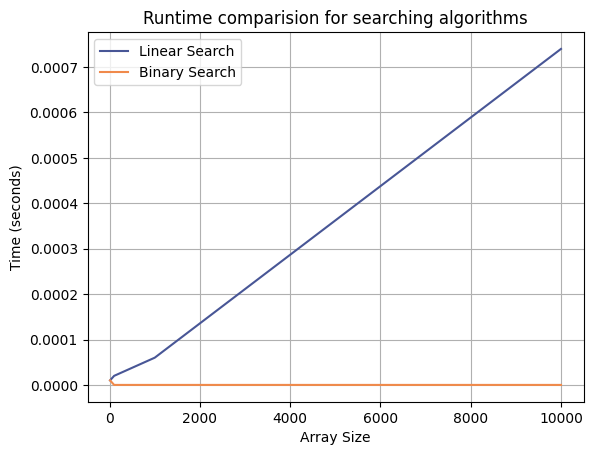

In [17]:
binary_search_runtime = []
linear_search_runtime = []

size = [10,100,1000,10000]
for i in size:
    arr = create_random_DynamicArray(i)
    sorted_arr = sort(arr)
    id = random.randint(1,10000)
    linear_search_runtime.append(measure_time(lambda: linear_search(arr,id)))
    binary_search_runtime.append(measure_time(lambda: binary_search(sorted_arr,id)))

plt.plot(size, linear_search_runtime, color = '#485696',label='Linear Search')
plt.plot(size,binary_search_runtime,color = '#F08A4B',label='Binary Search')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Runtime comparision for searching algorithms')
plt.legend()
plt.grid(True)

**Inference**:

- Here, we can see binary search performs better than the linear search in searching an event by id with time complexity of O(log N). But we need to keep in mind that binary search only works for sorted data.
- Linear search gives time complexity of O(N) for unsorted data. 

## Computing runtime for conflict detection

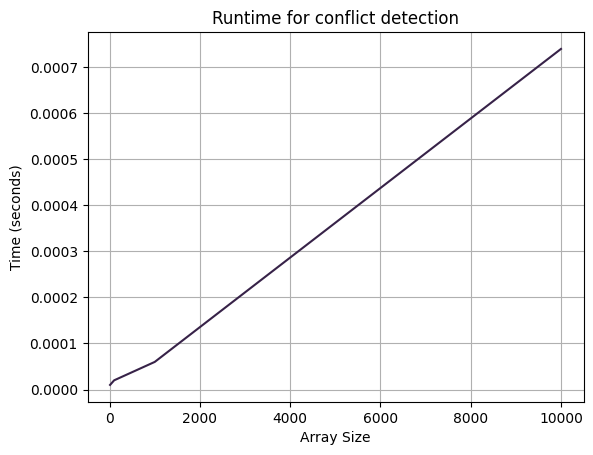

In [18]:
conflict_detection_runtime = []
size = [10,100,1000,10000]
for i in size:
    arr = create_random_DynamicArray(i)
    conflict_detection_runtime.append(measure_time(lambda: find_conflicts(arr)))
    
plt.plot(size, linear_search_runtime, color = '#372248')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Runtime for conflict detection')
plt.grid(True)
plt.show()

**Inference**

Here we can see conflict detection algorithm works in linear time - O(N). We achieved this time complexity as we are utilizing dictionary data structure to detect and store conflicted events with overlapping time on same date.

**Optimization**:

- The approach is already optimized with linear time complexity of O(N) as we are using hashing.
- But we can still make it leaner in memory and bit faster by avoiding building big lists by unless a actual conflict occurs.
- Do not allocate list for every key(date). Most keys will have only one event.
- Add to 'conflicts dictionary'  only when the second event for a key arrives.
-  Here we can use sweep line algorithm for parallel conflict detection. First we divide events into buckets by date, then we sort events by time and finally sweeps through sorted events by maintaining active queue of events.
  

# Scalability

## Esimating memory usage by dynamic array and linked list of 1000000 events

In [15]:
import psutil, os
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss/1024/1024

In [39]:
before = memory_usage()
create_random_DynamicArray(100_000)
after = memory_usage()
memory_usage_DA = after-before
print(f"Memory usage by dynamic array for 1000000 events : {memory_usage_DA:.2f} MB")

Memory usage by dynamic array for 1000000 events : 106.58 MB


In [40]:

before = memory_usage()
events = create_random_LinkedList(100_000)
after = memory_usage()
memory_usage_ll = after - before
print(f"Memory usage by dynamic array for 1000000 events : {memory_usage_ll:.2f} MB")

Memory usage by dynamic array for 1000000 events : 196.95 MB


In [46]:
import pandas as pd
pd.DataFrame({'Data Structure': ['Dynamic Array', 'Linked List'], 'Memory Usage':[memory_usage_DA, memory_usage_ll]})

,Data Structure,Memory Usage
0,Dynamic Array,106.578125
1,Linked List,196.953125


**Inference**:

Here, we can see linked list uses more memory to store 1M events than the array as each node in linked list is a python object with two attributes value and a reference. While each entry in array is a reference. That's why linkedlist here takes more memory than the arrays to store 1M events.